#<b>Milestone 2

###<b> Mounting the Drive

In [2]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


###<b>Loading libraries</b>

In [3]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras import optimizers

from tensorflow.keras.utils import to_categorical

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/MIT ADSP CAPSTONE PROJECT/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

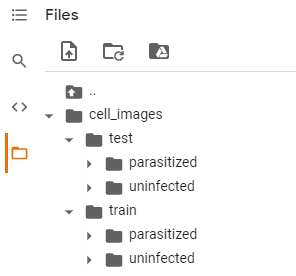

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [7]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b>Normalize the images

In [9]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images_norm = train_images[:]/255
train_images_norm2 = train_images_norm.astype('float32')

test_images_norm = test_images[:]/255
test_images_norm2 = test_images_norm.astype('float32')

print(type(train_images_norm2[:]))
print(type(test_images_norm2[:]))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###<B>One Hot Encoding on the train and test labels

In [10]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [11]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the model

In [11]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [13]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [14]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 14s 8ms/step - loss: 1.5772 - accuracy: 0.6079 - val_loss: 0.7900 - val_accuracy: 0.4361
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.5269 - accuracy: 0.7224 - val_loss: 0.4884 - val_accuracy: 0.8488
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1864 - accuracy: 0.9403 - val_loss: 0.2602 - val_accuracy: 0.9275
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1307 - accuracy: 0.9560 - val_loss: 0.1730 - val_accuracy: 0.9637
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1099 - accuracy: 0.9611 - val_loss: 0.1115 - val_accuracy: 0.9756
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0994 - accuracy: 0.9675 - val_loss: 0.1245 - val_accuracy: 0.9772
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0948 - accuracy: 0.9701 - val_loss: 0.0830 - val_accuracy: 0.9842
Epoch

###<b> Evaluating the model on test data

In [15]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9650

 Test_Accuracy:- 0.9649999737739563


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1300
           1       0.98      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.97      0.96      0.96      2600
weighted avg       0.97      0.96      0.96      2600



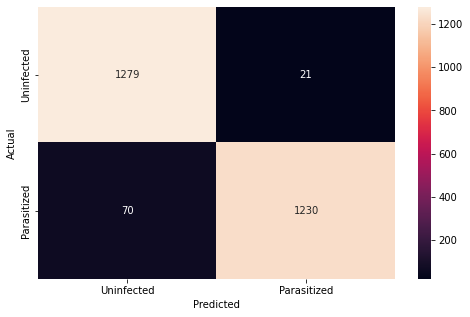

In [16]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [17]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

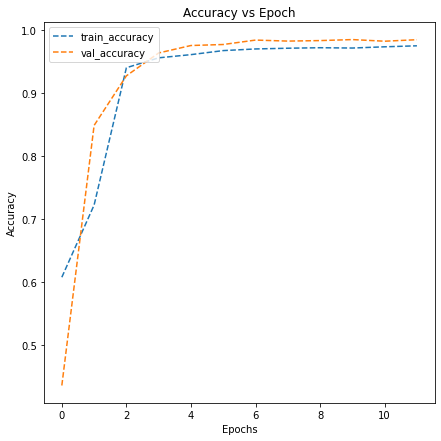

In [18]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [19]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [20]:
# Creating sequential model
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu")) # add one extra layer 

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [21]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [22]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [23]:
history = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 8ms/step - loss: 0.9933 - accuracy: 0.6183 - val_loss: 0.7300 - val_accuracy: 0.3373
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.6170 - accuracy: 0.6595 - val_loss: 0.5990 - val_accuracy: 0.8029
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1956 - accuracy: 0.9290 - val_loss: 0.2196 - val_accuracy: 0.9577
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1149 - accuracy: 0.9643 - val_loss: 0.1728 - val_accuracy: 0.9754
Epoch 5/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0927 - accuracy: 0.9687 - val_loss: 0.1118 - val_accuracy: 0.9800
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0841 - accuracy: 0.9745 - val_loss: 0.1157 - val_accuracy: 0.9760
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0779 - accuracy: 0.9745 - val_loss: 0.0764 - val_accuracy: 0.9856
Epoch 

###<b> Evaluating the model

In [24]:
accuracy = model1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9727

 Test_Accuracy:- 0.9726923108100891


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1300
           1       0.96      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



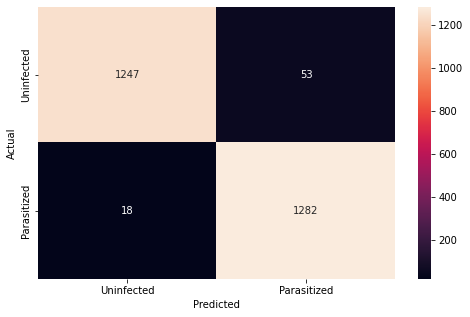

In [25]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [26]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

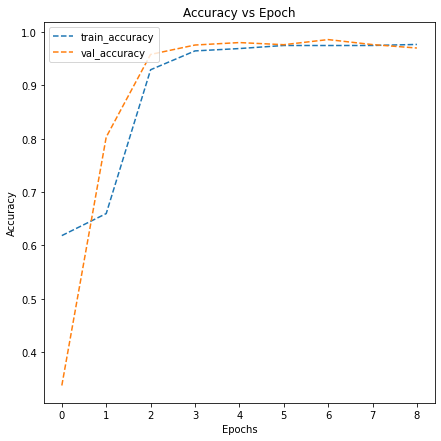

In [27]:
plot_accuracy(history)

<b> MODEL 1_2 with additional layer

In [28]:
backend.clear_session() # Clearing the backend for new model

In [29]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU

# Creating sequential model
model1_2 = Sequential()

model1_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1_2.add(MaxPooling2D(pool_size = 2))

model1_2.add(Dropout(0.2))

model1_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1_2.add(MaxPooling2D(pool_size = 2))

model1_2.add(Dropout(0.2))

model1_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1_2.add(MaxPooling2D(pool_size = 2))

model1_2.add(Dropout(0.2))

model1_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu")) # add one extra layer

model1_2.add(MaxPooling2D(pool_size = 2)) # additional max pool before 5th layer

model1_2.add(Dropout(0.2)) # additional dropout before 5th layer 

model1_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu")) # add another extra layer w/ 128 nodes

model1_2.add(Flatten())

model1_2.add(Dense(512, activation = "relu"))

model1_2.add(Dropout(0.4))

model1_2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1_2.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [30]:
model1_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [32]:
history = model1_2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.9922 - accuracy: 0.6459 - val_loss: 0.6219 - val_accuracy: 0.7358
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1960 - accuracy: 0.9308 - val_loss: 0.1613 - val_accuracy: 0.9623
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.1262 - accuracy: 0.9588 - val_loss: 0.1431 - val_accuracy: 0.9692
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1069 - accuracy: 0.9648 - val_loss: 0.1177 - val_accuracy: 0.9784
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0938 - accuracy: 0.9701 - val_loss: 0.1018 - val_accuracy: 0.9800
Epoch 6/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.0746 - val_accuracy: 0.9806
Epoch 7/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0823 - accuracy: 0.9742 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 

In [33]:
accuracy = model1_2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



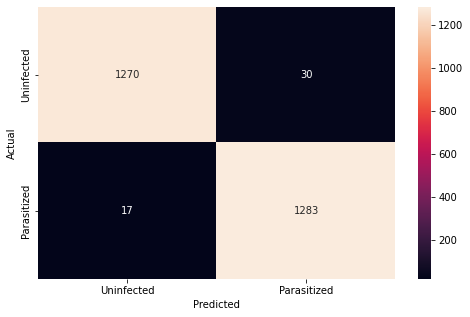

In [34]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1_2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [35]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

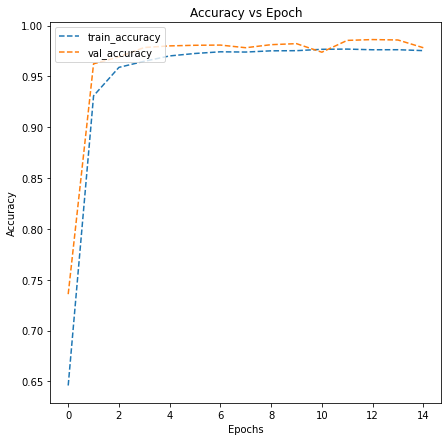

In [36]:
plot_accuracy(history)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [37]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [38]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(512))

model2.add(LeakyReLU(0.1))

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax"))

model2.summary()

#----------------------

#model = Sequential()

#model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

#model.add(MaxPooling2D(pool_size = 2))

#model.add(Dropout(0.2))

#model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

#model.add(MaxPooling2D(pool_size = 2))

#model.add(Dropout(0.2))

#model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

#model.add(MaxPooling2D(pool_size = 2))

#model.add(Dropout(0.2))

#model.add(Flatten())

#model.add(Dense(512, activation = "relu"))

#model.add(Dropout(0.4))

#model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

#model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0

###<b>Compiling the model

In [39]:
model2.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

<b> Using callbacks

In [40]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [41]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.2770 - accuracy: 0.8871 - val_loss: 1.0867 - val_accuracy: 0.4597
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0969 - accuracy: 0.9682 - val_loss: 0.3645 - val_accuracy: 0.9010
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0783 - accuracy: 0.9746 - val_loss: 0.0819 - val_accuracy: 0.9934
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0711 - accuracy: 0.9768 - val_loss: 0.0731 - val_accuracy: 0.9872
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0640 - accuracy: 0.9796 - val_loss: 0.1377 - val_accuracy: 0.9792
Epoch 6/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.0878 - val_accuracy: 0.9826


<b>Plotting the train and validation accuracy

In [42]:
# Plotting the accuracies
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

###<b>Evaluating the model

In [43]:
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9800

 Test_Accuracy:- 0.9800000190734863


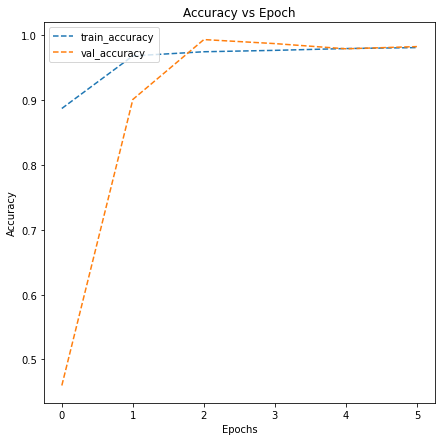

In [44]:
# Evaluate the model to calculate the accuracy
plot_accuracy(history2)

####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



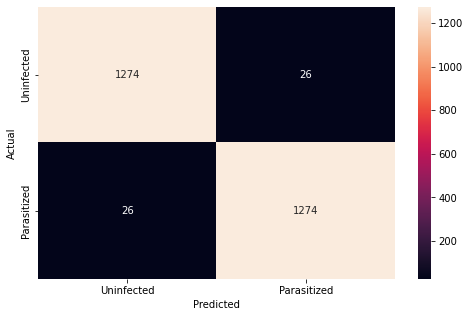

In [45]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [46]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images_norm2, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

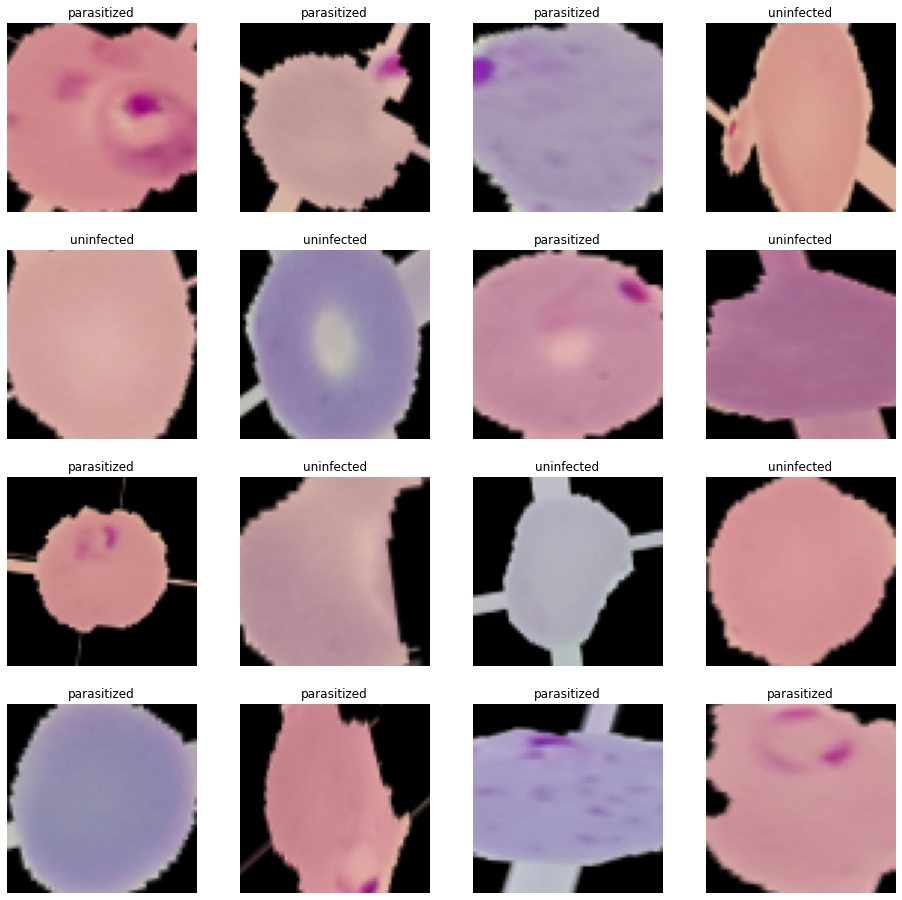

In [48]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: ____

###<b>Building the Model

In [49]:
model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu")) # add one extra layer

model3.add(MaxPooling2D(pool_size = 2)) # additional max pool before 5th layer

model3.add(Dropout(0.2)) # additional dropout before 5th layer 

model3.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu")) # add another extra layer w/ 128 nodes

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [50]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [51]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 24s 75ms/step - loss: 0.6037 - accuracy: 0.6460 - val_loss: 0.1533 - val_accuracy: 0.9469
Epoch 2/20
312/312 [==============================] - 25s 79ms/step - loss: 0.2115 - accuracy: 0.9213 - val_loss: 0.1257 - val_accuracy: 0.9732
Epoch 3/20
312/312 [==============================] - 24s 78ms/step - loss: 0.1808 - accuracy: 0.9372 - val_loss: 0.0879 - val_accuracy: 0.9748
Epoch 4/20
312/312 [==============================] - 25s 81ms/step - loss: 0.1651 - accuracy: 0.9450 - val_loss: 0.0800 - val_accuracy: 0.9782
Epoch 5/20
312/312 [==============================] - 24s 76ms/step - loss: 0.1610 - accuracy: 0.9450 - val_loss: 0.0798 - val_accuracy: 0.9762
Epoch 6/20
312/312 [==============================] - 25s 81ms/step - loss: 0.1539 - accuracy: 0.9485 - val_loss: 0.0728 - val_accuracy: 0.9770
Epoch 7/20
312/312 [==============================] - 25s 79ms/step - loss: 0.1506 - accuracy: 0.9496 - val_loss: 0.0764 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

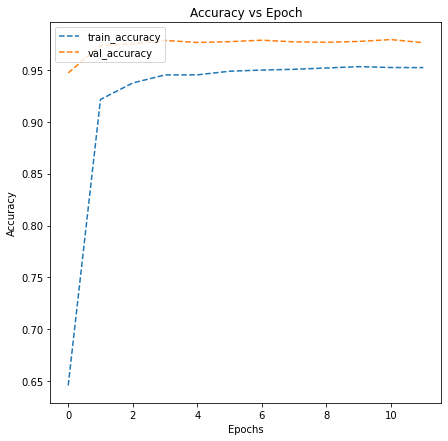

In [52]:
# Potting the accuracies
plot_accuracy(history3)

In [53]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images_norm2, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 5ms/step - loss: 0.0566 - accuracy: 0.9823

 Test_Accuracy:- 0.9823076725006104


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



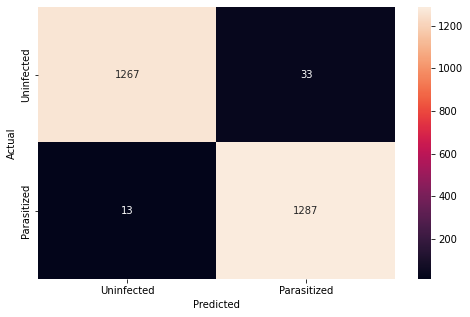

In [54]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images_norm2)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [17]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [19]:
transfer_layer = vgg.get_layer('block3_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [20]:
# Compiling the model 
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<b> using callbacks

In [21]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [22]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
624/624 [==============================] - 693s 1s/step - loss: 0.2097 - accuracy: 0.9204 - val_loss: 0.1788 - val_accuracy: 0.9533
Epoch 2/10
624/624 [==============================] - 687s 1s/step - loss: 0.1382 - accuracy: 0.9522 - val_loss: 0.1618 - val_accuracy: 0.9511
Epoch 3/10
624/624 [==============================] - 685s 1s/step - loss: 0.1214 - accuracy: 0.9546 - val_loss: 0.0548 - val_accuracy: 0.9868
Epoch 4/10
624/624 [==============================] - 683s 1s/step - loss: 0.1093 - accuracy: 0.9604 - val_loss: 0.0380 - val_accuracy: 0.9924
Epoch 5/10
624/624 [==============================] - 691s 1s/step - loss: 0.0977 - accuracy: 0.9659 - val_loss: 0.0506 - val_accuracy: 0.9888
Epoch 6/10
624/624 [==============================] - 694s 1s/step - loss: 0.0985 - accuracy: 0.9650 - val_loss: 0.2237 - val_accuracy: 0.9417


<b>Plot the train and validation accuracy

In [23]:
# Plotting the accuracies
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

In [24]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 70s 850ms/step - loss: 0.1645 - accuracy: 0.9488

 Test_Accuracy:- 0.948846161365509


<b>Plotting the classification report and confusion matrix

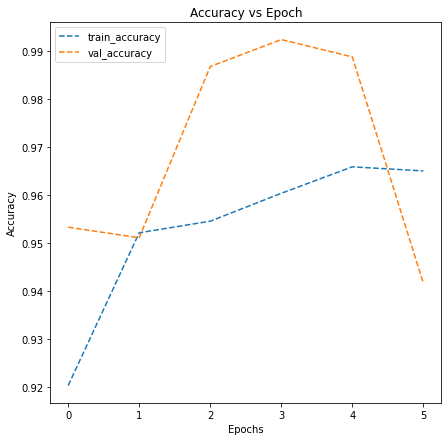

In [25]:
# plotting the accuracies
plot_accuracy(history4)

82/82 [==============================] - 72s 873ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1300
           1       0.92      0.98      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



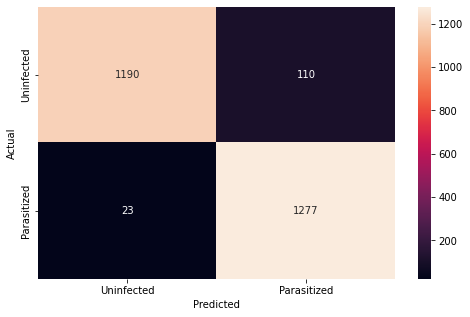

In [26]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?